In [1]:
import yt

ds = yt.load("SILCC_hdf5_plt_cnt_3000")

yt : [INFO     ] 2024-03-22 14:20:05,590 Parameters: current_time              = 1012579443737342.4
yt : [INFO     ] 2024-03-22 14:20:05,591 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2024-03-22 14:20:05,593 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2024-03-22 14:20:05,593 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2024-03-22 14:20:05,594 Parameters: cosmological_simulation   = 0


In [2]:
ds.field_list


[('flash', 'cdco'),
 ('flash', 'cdh2'),
 ('flash', 'cdto'),
 ('flash', 'dens'),
 ('flash', 'eint'),
 ('flash', 'ener'),
 ('flash', 'gpot'),
 ('flash', 'ico '),
 ('flash', 'icp '),
 ('flash', 'ih2 '),
 ('flash', 'iha '),
 ('flash', 'ihp '),
 ('flash', 'magx'),
 ('flash', 'magy'),
 ('flash', 'magz'),
 ('flash', 'pres'),
 ('flash', 'tdus'),
 ('flash', 'temp'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'velz')]

In [3]:
ds.derived_field_list

[('flash', 'cdco'),
 ('flash', 'cdh2'),
 ('flash', 'cdto'),
 ('flash', 'cell_volume'),
 ('flash', 'dens'),
 ('flash', 'dx'),
 ('flash', 'dy'),
 ('flash', 'dz'),
 ('flash', 'eint'),
 ('flash', 'ener'),
 ('flash', 'gpot'),
 ('flash', 'ico '),
 ('flash', 'icp '),
 ('flash', 'ih2 '),
 ('flash', 'iha '),
 ('flash', 'ihp '),
 ('flash', 'magx'),
 ('flash', 'magy'),
 ('flash', 'magz'),
 ('flash', 'path_element_x'),
 ('flash', 'path_element_y'),
 ('flash', 'path_element_z'),
 ('flash', 'pres'),
 ('flash', 'tdus'),
 ('flash', 'temp'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'velz'),
 ('flash', 'volume'),
 ('flash', 'x'),
 ('flash', 'y'),
 ('flash', 'z'),
 ('gas', 'alfven_speed'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vortici

In [4]:
fields = [ ('gas', 'density'), ('gas', 'magnetic_field_strength'), ('gas', 'velocity_magnitude')]
for orientation in ["x", "y", "z"]:
    slc = yt.SlicePlot(ds, orientation, center=ds.domain_center, fields=fields)
    slc.save()

yt : [INFO     ] 2024-03-22 14:20:12,500 xlim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2024-03-22 14:20:12,500 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2024-03-22 14:20:12,501 xlim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2024-03-22 14:20:12,501 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2024-03-22 14:20:12,504 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2024-03-22 14:20:12,532 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800
yt : [INFO     ] 2024-03-22 14:20:12,537 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2024-03-22 14:20:13,144 Saving plot SILCC_hdf5_plt_cnt_3000_Slice_x_magnetic_field_strength.png
yt : [INFO     ] 2024-03-22 14:20:13,311 Saving plot SILCC_hdf5_plt_cnt_3000_Slice_x_density.png
yt : [IN

In [5]:
# mass
phaseplot1 = yt.PhasePlot(ds, ("gas", "density"), ("gas", "temperature"), [("gas", "mass")], weight_field=None)
phaseplot1.save()
# volume
phaseplot2 = yt.PhasePlot(ds, ("gas", "density"), ("gas", "temperature"), [("gas", "volume")], weight_field=None)
phaseplot2.save()


yt : [INFO     ] 2024-03-22 14:20:22,392 Saving plot SILCC_hdf5_plt_cnt_3000_2d-Profile_density_temperature_mass.png
yt : [INFO     ] 2024-03-22 14:20:23,337 Saving plot SILCC_hdf5_plt_cnt_3000_2d-Profile_density_temperature_volume.png


['SILCC_hdf5_plt_cnt_3000_2d-Profile_density_temperature_volume.png']

In [6]:
ad = ds.all_data()

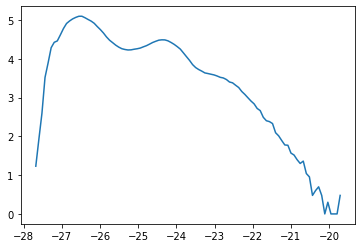

In [7]:
# 1D histogram
import numpy as np
import matplotlib.pyplot as plt
H, ed = np.histogram(np.log10(ad[("gas", "density")]), bins=100)
ctr = 0.5*(ed[1:]+ed[:-1])
fig, ax = plt.subplots()
ax.plot(ctr, np.log10(H))

<ipython-input-8-d094672cedff>:10: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(H.T), origin="lower", extent=[edx[0], edx[-1], edy[0], edy[-1]])


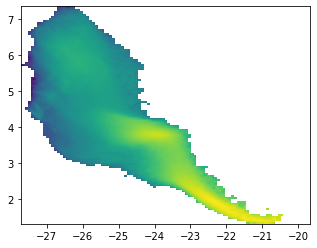

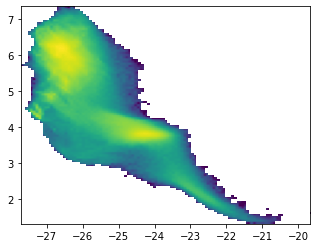

In [8]:
# 2D histograms
# phaseplot example

for weight in [ad[("gas", "cell_mass")], ad[("gas", "cell_volume")]]:
    H, edx, edy = np.histogram2d(np.log10(ad[("gas", "density")]), np.log10(ad[("gas", "temperature")]),\
                                 bins=(100,100), weights=weight)
    ctrx = 0.5*(edx[1:]+edx[:-1])
    ctry = 0.5*(edy[1:]+edy[:-1])
    fig, ax = plt.subplots()
    ax.imshow(np.log10(H.T), origin="lower", extent=[edx[0], edx[-1], edy[0], edy[-1]])

In [9]:
# change temperature values
idx = np.where((ad[("gas", "density")] < 1e-25) & (ad[("gas", "temperature")] > 1e6))
ad[("gas", "temperature")][idx] = 10.0*ad[("gas", "temperature")][idx]

<ipython-input-10-712990d56e4c>:8: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(H.T), origin="lower", extent=[edx[0], edx[-1], edy[0], edy[-1]])


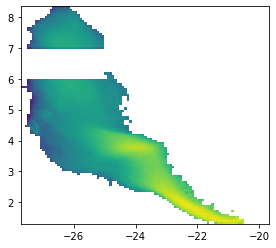

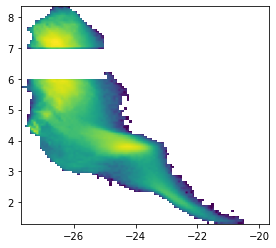

In [10]:
# redo phase plots
for weight in [ad[("gas", "cell_mass")], ad[("gas", "cell_volume")]]:
    H, edx, edy = np.histogram2d(np.log10(ad[("gas", "density")]), np.log10(ad[("gas", "temperature")]),\
                                 bins=(100,100), weights=weight)
    ctrx = 0.5*(edx[1:]+edx[:-1])
    ctry = 0.5*(edy[1:]+edy[:-1])
    fig, ax = plt.subplots()
    ax.imshow(np.log10(H.T), origin="lower", extent=[edx[0], edx[-1], edy[0], edy[-1]])